In [1]:
import seaborn as sns
from pandas import read_parquet
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from data import file

In [2]:
data_train = read_parquet(file.news_articles_cleaned_train)
data_train

,text_original,label,text_tokenized,text_tokenized_keywords,text_keywords,text_tokenized_lemmas,text_lemmas,text_tokenized_stemmed,text_stem
0,21-Jähriger fällt wohl bis Saisonende aus. Wie...,Sport,"[21-jähriger, fällt, wohl, bis, saisonende, au...","[21-jähriger, fällt, wohl, saisonende, ., wien...",21-jähriger fällt wohl saisonende . wien – rap...,"[21-jähriger, fällen, wohl, saisonende, wien, ...",21-jähriger fällen wohl saisonende wien rapid ...,"[21-jahrig, fallt, wohl, saison, wien, rapid, ...",21-jahrig fallt wohl saison wien rapid wohl sa...
1,"Erfundene Bilder zu Filmen, die als verloren g...",Kultur,"[erfundene, bilder, zu, filmen, ,, die, als, v...","[erfundene, bilder, filmen, ,, verloren, gelte...","erfundene bilder filmen , verloren gelten : ``...","[erfunden, bilder, filmen, verlieren, gelten, ...",erfunden bilder filmen verlieren gelten `` the...,"[erfund, bild, film, verlor, gelt, ``, the, fo...",erfund bild film verlor gelt `` the forbidd ro...
2,Der frischgekürte CEO Sundar Pichai setzt auf ...,Web,"[der, frischgekürte, ceo, sundar, pichai, setz...","[frischgekürte, ceo, sundar, pichai, setzt, um...",frischgekürte ceo sundar pichai setzt umgängli...,"[frischgekürte, ceo, sundar, pichai, setzen, u...",frischgekürte ceo sundar pichai setzen umgängl...,"[frischgekurt, ceo, sundar, pichai, setzt, umg...",frischgekurt ceo sundar pichai setzt umgang fu...
3,"Putin: ""Einigung, dass wir Menge auf Niveau vo...",Wirtschaft,"[putin, :, ``, einigung, ,, dass, wir, menge, ...","[putin, :, ``, einigung, ,, menge, niveau, jän...","putin : `` einigung , menge niveau jänner halt...","[putin, ``, einigung, menge, niveau, jänner, h...",putin `` einigung menge niveau jänner halten m...,"[putin, ``, einig, meng, niveau, jann, halt, '...",putin `` einig meng niveau jann halt '' moskau...
4,Estland sieht den künftigen österreichischen P...,Inland,"[estland, sieht, den, künftigen, österreichisc...","[estland, sieht, künftigen, österreichischen, ...",estland sieht künftigen österreichischen präsi...,"[estland, sehen, künftig, österreichisch, präs...",estland sehen künftig österreichisch präsident...,"[estland, sieht, kunftig, osterreich, prasiden...",estland sieht kunftig osterreich prasident est...
...,...,...,...,...,...,...,...,...,...
9240,Bernd Saurer war Bridge-Juniorenweltmeister un...,Inland,"[bernd, saurer, war, bridge-juniorenweltmeiste...","[bernd, saurer, bridge-juniorenweltmeister, ,,...","bernd saurer bridge-juniorenweltmeister , krau...","[bernd, sauer, bridge-juniorenweltmeister, kra...",bernd sauer bridge-juniorenweltmeister krauss ...,"[bernd, saur, bridge-juniorenweltmeist, krauss...",bernd saur bridge-juniorenweltmeist krauss sch...
9241,Sandhere soll in vergangener Woche bei Luftang...,International,"[sandhere, soll, in, vergangener, woche, bei, ...","[sandhere, vergangener, woche, luftangriff, ge...",sandhere vergangener woche luftangriff getötet...,"[sandhere, vergangen, woche, luftangriff, töte...",sandhere vergangen woche luftangriff töten wer...,"[sandh, vergang, woch, luftangriff, getotet, w...",sandh vergang woch luftangriff getotet word wa...
9242,Derzeit Konzeptgruppe in Berlin – Kein Komment...,Wirtschaft,"[derzeit, konzeptgruppe, in, berlin, –, kein, ...","[derzeit, konzeptgruppe, berlin, –, kommentar,...",derzeit konzeptgruppe berlin – kommentar apple...,"[derzeit, konzeptgruppe, berlin, kommentar, ap...",derzeit konzeptgruppe berlin kommentar apple m...,"[derzeit, konzeptgrupp, berlin, kommentar, app...",derzeit konzeptgrupp berlin kommentar appl mag...
9243,Landeshauptmann will den vierten Regierungssit...,Inland,"[landeshauptmann, will, den, vierten, regierun...","[landeshauptmann, vierten, regierungssitz, erh...",landeshauptmann vierten regierungssitz erhalte...,"[landeshauptmann, viert, regierungssitz, erhal...",landeshauptmann viert regierungssitz erhalten ...,"[landeshauptmann, viert, regierungssitz, erhal...",landeshauptmann viert regierungssitz erhalt fp...


In [3]:
data_test = read_parquet(file.news_articles_cleaned_test)
data_test

,text_original,label,text_tokenized,text_tokenized_keywords,text_keywords,text_tokenized_lemmas,text_lemmas,text_tokenized_stemmed,text_stem
0,"Die Gewerkschaft GPA-djp lanciert den ""All-in-...",Wirtschaft,"[die, gewerkschaft, gpa-djp, lanciert, den, ``...","[gewerkschaft, gpa-djp, lanciert, ``, all-in-r...",gewerkschaft gpa-djp lanciert `` all-in-rechne...,"[gewerkschaft, gpa-djp, lanciert, ``, all-in-r...",gewerkschaft gpa-djp lanciert `` all-in-rechne...,"[gewerkschaft, gpa-djp, lanciert, ``, all-in-r...",gewerkschaft gpa-djp lanciert `` all-in-rechn ...
1,Franzosen verteidigen 2:1-Führung – Kritische ...,Sport,"[franzosen, verteidigen, 2:1-führung, –, kriti...","[franzosen, verteidigen, 2:1-führung, –, kriti...",franzosen verteidigen 2:1-führung – kritische ...,"[franzosen, verteidigen, 2:1-führung, kritisch...",franzosen verteidigen 2:1-führung kritisch sti...,"[franzos, verteid, 2:1-fuhrung, kritisch, stim...",franzos verteid 2:1-fuhrung kritisch stimm sch...
2,Neues Video von Designern macht im Netz die Ru...,Web,"[neues, video, von, designern, macht, im, netz...","[neues, video, designern, macht, netz, runde, ...",neues video designern macht netz runde – schla...,"[neu, video, designern, machen, netz, runden, ...",neu video designern machen netz runden schlage...,"[neu, video, design, macht, netz, rund, schlag...",neu video design macht netz rund schlag etwa b...
3,23-jähriger Brasilianer muss vier Spiele pausi...,Sport,"[23-jähriger, brasilianer, muss, vier, spiele,...","[23-jähriger, brasilianer, vier, spiele, pausi...",23-jähriger brasilianer vier spiele pausieren ...,"[23-jähriger, brasilianer, vier, spiele, pausi...",23-jähriger brasilianer vier spiele pausieren ...,"[23-jahrig, brasilian, vier, spiel, pausi, ent...",23-jahrig brasilian vier spiel pausi entscheid...
4,Aufständische verwendeten Chemikalie bei Gefec...,International,"[aufständische, verwendeten, chemikalie, bei, ...","[aufständische, verwendeten, chemikalie, gefec...",aufständische verwendeten chemikalie gefechten...,"[aufständisch, verwenden, chemikalie, gefechte...",aufständisch verwenden chemikalie gefechten au...,"[aufstand, verwendet, chemikali, gefecht, augu...",aufstand verwendet chemikali gefecht august da...
...,...,...,...,...,...,...,...,...,...
1023,"Programm ""Ebay Plus"" soll Ende September start...",Web,"[programm, ``, ebay, plus, '', soll, ende, sep...","[programm, ``, ebay, plus, '', ende, september...",programm `` ebay plus '' ende september starte...,"[programm, ``, ebay, plus, ende, september, st...",programm `` ebay plus ende september starten d...,"[programm, ``, ebay, plus, '', end, septemb, s...",programm `` ebay plus '' end septemb start deu...
1024,"Fehlerhafte Bilanz 2013, Partei will berufen –...",Inland,"[fehlerhafte, bilanz, 2013, ,, partei, will, b...","[fehlerhafte, bilanz, 2013, ,, partei, berufen...","fehlerhafte bilanz 2013 , partei berufen – str...","[fehlerhaft, bilanz, 2013, partei, berufen, st...",fehlerhaft bilanz 2013 partei berufen strafe w...,"[fehlerhaft, bilanz, 2013, partei, beruf, stra...",fehlerhaft bilanz 2013 partei beruf straf weg ...
1025,Als erster Olympia-Champion auch Hawaii-Sieger...,Sport,"[als, erster, olympia-champion, auch, hawaii-s...","[erster, olympia-champion, hawaii-sieger, –, n...",erster olympia-champion hawaii-sieger – nieder...,"[erst, olympia-champion, hawaii-sieger, nieder...",erst olympia-champion hawaii-sieger niederöste...,"[erst, olympia-champion, hawaii-sieg, niederos...",erst olympia-champion hawaii-sieg niederosterr...
1026,Der Außenseiter aus Denver gewinnt die 50. Sup...,Sport,"[der, außenseiter, aus, denver, gewinnt, die, ...","[außenseiter, denver, gewinnt, 50, ., super, b...",außenseiter denver gewinnt 50 . super bowl car...,"[außenseiter, denver, gewinnen, 50, super, bow...",außenseiter denver gewinnen 50 super bowl caro...,"[aussenseit, denv, gewinnt, 50, sup, bowl, car...",aussenseit denv gewinnt 50 sup bowl carolina p...


In [5]:
from numpy import atleast_1d

def join(tokens):
    return ' '.join(tokens)

labelEncoder = LabelEncoder()
labelEncoder.fit(data_train["label"])

X_train, y_train = data_train.text_tokenized_lemmas.map(join), atleast_1d(
    labelEncoder.transform(data_train["label"])).transpose()
X_test, y_test = data_test.text_tokenized_lemmas.map(join), atleast_1d(
    labelEncoder.transform(data_test["label"])).transpose()

In [6]:
X_train

0       21-jähriger fällen wohl saisonende wien rapid ...
1       erfunden bilder filmen verlieren gelten `` the...
2       frischgekürte ceo sundar pichai setzen umgängl...
3       putin `` einigung menge niveau jänner halten m...
4       estland sehen künftig österreichisch präsident...
                              ...                        
9240    bernd sauer bridge-juniorenweltmeister krauss ...
9241    sandhere vergangen woche luftangriff töten wer...
9242    derzeit konzeptgruppe berlin kommentar apple m...
9243    landeshauptmann viert regierungssitz erhalten ...
9244    millionen syrisch flüchtlingen kamerafrau rech...
Name: text_tokenized_lemmas, Length: 9245, dtype: object

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("vec", CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ("clf", SGDClassifier())
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vec', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier())])

In [8]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


In [9]:

report = classification_report(y_train, y_train_pred)
print("Train:")
print(report)
report = classification_report(y_test, y_test_pred)
print("Test:")
print(report)

Train:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       601
           1       0.99      0.99      0.99       913
           2       1.00      0.99      0.99      1360
           3       1.00      1.00      1.00       485
           4       0.99      0.99      0.99      1510
           5       1.00      1.00      1.00      1081
           6       0.99      0.99      0.99      1509
           7       0.98      0.99      0.99      1270
           8       1.00      1.00      1.00       516

    accuracy                           0.99      9245
   macro avg       0.99      0.99      0.99      9245
weighted avg       0.99      0.99      0.99      9245

Test:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        67
           1       0.89      0.83      0.86       102
           2       0.89      0.83      0.86       151
           3       0.86      0.89      0.87        54
           

[[ 54   2   1   1   2   0   5   2   0]
 [  0  85   1   3   6   0   0   4   3]
 [  2   2 125   2  12   1   0   6   1]
 [  1   0   1  48   4   0   0   0   0]
 [  1   4   7   2 144   0   2   5   3]
 [  0   0   0   0   0 119   1   0   0]
 [  1   0   2   0   2   0 155   7   1]
 [  0   3   3   0   5   0   5 125   0]
 [  0   0   1   0   0   0   0   1  55]]


<AxesSubplot:>

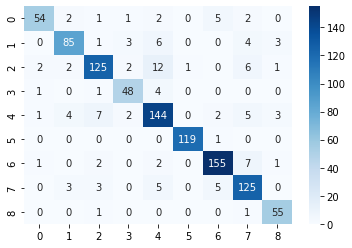

In [10]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_test_pred)
print(cf_matrix)

sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='.3g')

<AxesSubplot:>

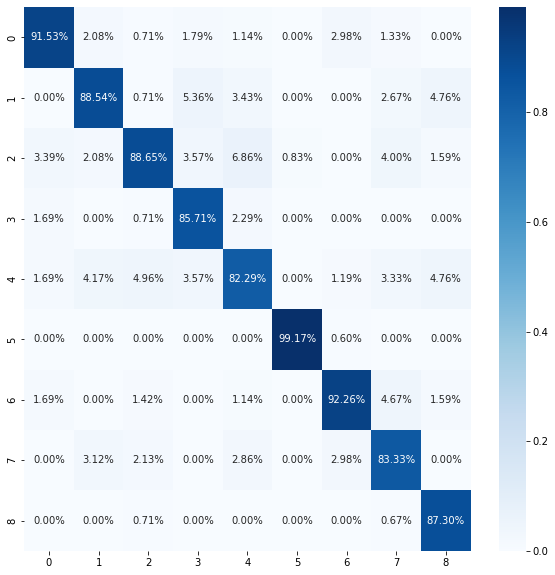

In [12]:

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cf_matrix / sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', ax=ax)